# "Segmenting Promo Code Impact by Gender: A/B Testing Insights"

In [ ]:
# 0. Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, shapiro, ttest_ind, mannwhitneyu
import numpy as np

In [ ]:
# 1. Exploratory Data Analysis of Experiment

In [ ]:
# Load the dataset
df = pd.read_csv("simulated_experiment_data.csv")

# Display basic info and check for missing values
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         425 non-null    int64  
 1   Group               425 non-null    object 
 2   Promo_Code_Applied  425 non-null    object 
 3   Order_Value         425 non-null    float64
 4   Gender              425 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 16.7+ KB
None

Missing Values:
Customer_ID           0
Group                 0
Promo_Code_Applied    0
Order_Value           0
Gender                0
dtype: int64


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\jwhin\AppData\Local\Temp\ipykernel_17852\3161009031.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("C:\projects\Jupyter_Notebook\datasource\simulated_experiment_data.csv")


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Customer_ID  Order_Value
count   425.000000   425.000000
mean    213.000000    76.376259
std     122.831185     9.684099
min       1.000000    42.590000
25%     107.000000    69.230000
50%     213.000000    76.310000
75%     319.000000    82.750000
max     425.000000   113.530000


In [31]:
# Mean AOV by Gender and Group
group_gender_mean = df.groupby(['Gender', 'Group'])['Order_Value'].mean()
print("\nMean Order Value by Gender and Group:")
print(group_gender_mean)


Mean Order Value by Gender and Group:
Gender  Group    
Female  Control      76.049434
        Treatment    81.037879
Male    Control      75.323636
        Treatment    77.839298
Name: Order_Value, dtype: float64


In [6]:
# Count of Treatment vs. Control by Gender
group_gender_counts = df.groupby(['Gender', 'Group']).size()
print("\nGroup Distribution by Gender:")
print(group_gender_counts)


Group Distribution by Gender:
Gender  Group    
Female  Control      159
        Treatment     33
Male    Control      176
        Treatment     57
dtype: int64


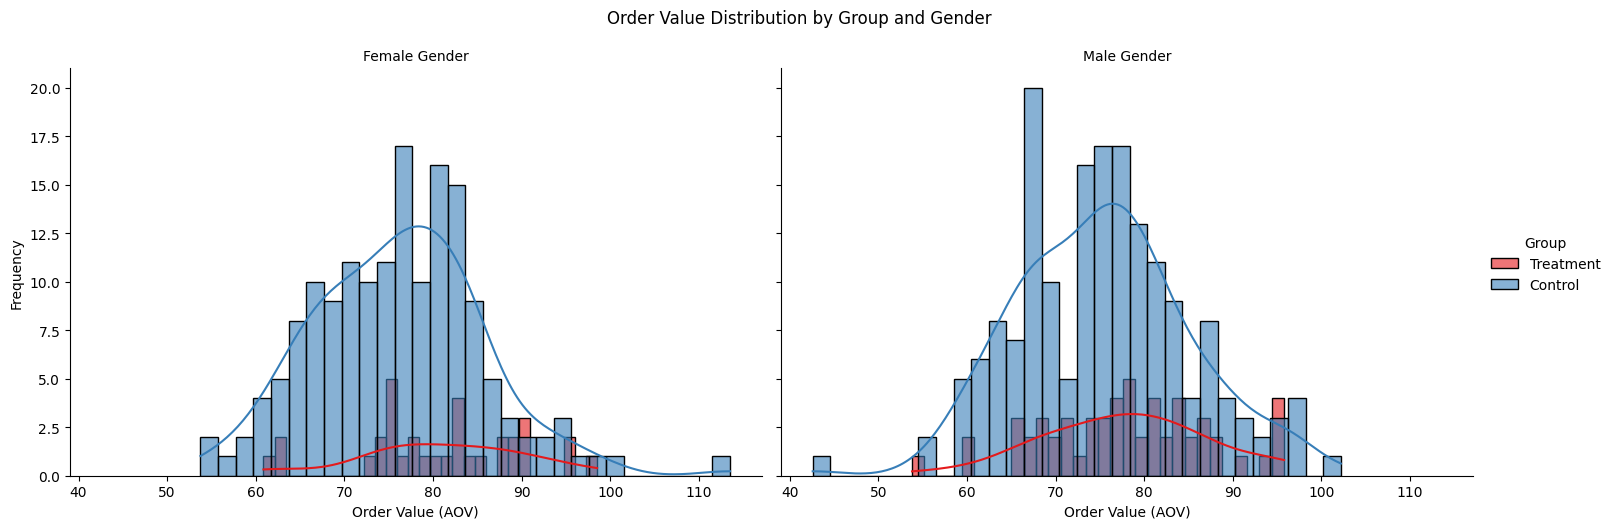

In [8]:
# Visualize order value distribution by Gender and Group
g = sns.FacetGrid(df, col="Gender", hue="Group", height=5, aspect=1.5, palette="Set1")
g.map(sns.histplot, "Order_Value", kde=True, bins=30, alpha=0.6)
g.set_titles("{col_name} Gender")
g.set_axis_labels("Order Value (AOV)", "Frequency")
g.add_legend(title="Group")
plt.suptitle("Order Value Distribution by Group and Gender", y=1.05)
plt.show()

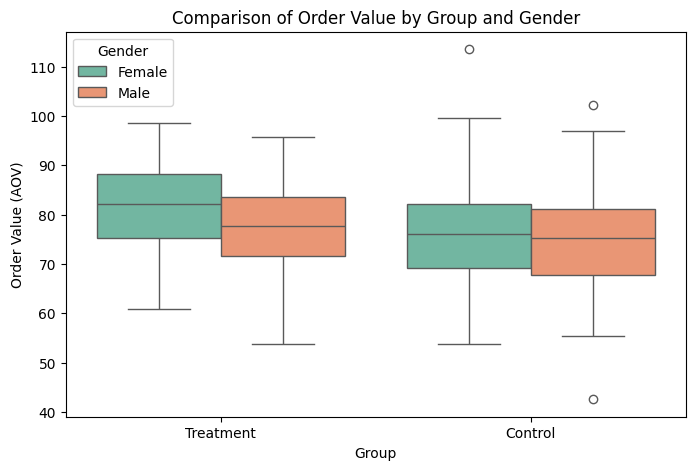

In [9]:
# Boxplot to compare AOV by Group and Gender
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Group", y="Order_Value", hue="Gender", palette="Set2")
plt.title("Comparison of Order Value by Group and Gender")
plt.xlabel("Group")
plt.ylabel("Order Value (AOV)")
plt.legend(title="Gender")
plt.show()

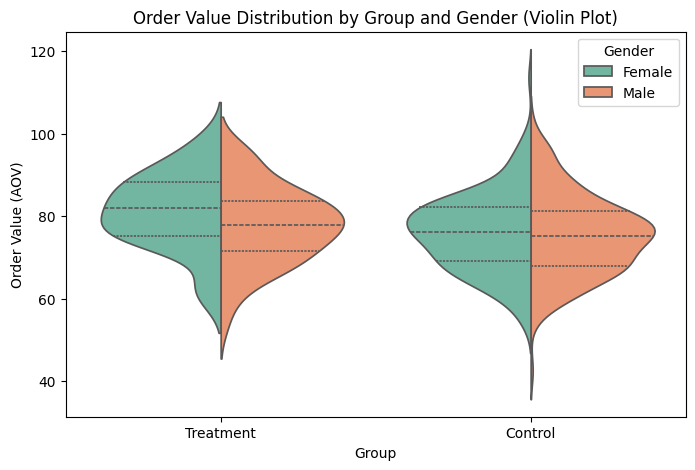

In [10]:
# Violin plot to compare AOV by Group and Gender
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Group", y="Order_Value", hue="Gender", split=True, palette="Set2", inner="quartile")
plt.title("Order Value Distribution by Group and Gender (Violin Plot)")
plt.xlabel("Group")
plt.ylabel("Order Value (AOV)")
plt.legend(title="Gender")
plt.show()

In [11]:
# EDA Results and Conclusions
print("\nEDA Insights:")
print("- No missing values detected.")
print("- Imbalance: Treatment (90) vs. Control (335), now segmented by Gender.")
print("- Distributions suggest potential gender differences in promo code response.")


EDA Insights:
- No missing values detected.
- Imbalance: Treatment (90) vs. Control (335), now segmented by Gender.
- Distributions suggest potential gender differences in promo code response.


In [ ]:
# 2. Segment Data by Gender

In [15]:
# 2. Segment Data by Gender
male_treatment = df[(df['Gender'] == 'Male') & (df['Group'] == 'Treatment')]['Order_Value']
male_control = df[(df['Gender'] == 'Male') & (df['Group'] == 'Control')]['Order_Value']
female_treatment = df[(df['Gender'] == 'Female') & (df['Group'] == 'Treatment')]['Order_Value']
female_control = df[(df['Gender'] == 'Female') & (df['Group'] == 'Control')]['Order_Value']

In [16]:
# Check segment sizes
print("\nSegment Sizes:")
print(f"Male Treatment: {len(male_treatment)}")
print(f"Male Control: {len(male_control)}")
print(f"Female Treatment: {len(female_treatment)}")
print(f"Female Control: {len(female_control)}")


Segment Sizes:
Male Treatment: 57
Male Control: 176
Female Treatment: 33
Female Control: 159


In [ ]:
# 3. Check Assumptions by Segment

In [17]:
# Homogeneity of variance
levene_male_stat, levene_male_p = levene(male_treatment, male_control)
levene_female_stat, levene_female_p = levene(female_treatment, female_control)
print("\nLevene’s Test for Homogeneity of Variance by Gender:")
print(f"Male: Statistic={levene_male_stat:.4f}, p-value={levene_male_p:.4f}")
print(f"Female: Statistic={levene_female_stat:.4f}, p-value={levene_female_p:.4f}")


Levene’s Test for Homogeneity of Variance by Gender:
Male: Statistic=0.1524, p-value=0.6966
Female: Statistic=0.0333, p-value=0.8553


In [ ]:
# 3. Check Assumptions by Segment

In [18]:
# Homogeneity of variance
print("\nLevene’s Test for Homogeneity of Variance by Gender:")
if len(male_treatment) > 1 and len(male_control) > 1:
    levene_male_stat, levene_male_p = levene(male_treatment, male_control)
    print(f"Male: Statistic={levene_male_stat:.4f}, p-value={levene_male_p:.4f}")
else:
    print("Male: Insufficient data for Levene’s test (need at least 2 values per group)")
if len(female_treatment) > 1 and len(female_control) > 1:
    levene_female_stat, levene_female_p = levene(female_treatment, female_control)
    print(f"Female: Statistic={levene_female_stat:.4f}, p-value={levene_female_p:.4f}")
else:
    print("Female: Insufficient data for Levene’s test (need at least 2 values per group)")


Levene’s Test for Homogeneity of Variance by Gender:
Male: Statistic=0.1524, p-value=0.6966
Female: Statistic=0.0333, p-value=0.8553


In [27]:
# Normality test
shapiro_male_t = shapiro(male_treatment)
shapiro_male_c = shapiro(male_control)
shapiro_female_t = shapiro(female_treatment)
shapiro_female_c = shapiro(female_control)
print("\nShapiro-Wilk Test for Normality by Gender:")
print(f"Male Treatment: Statistic={shapiro_male_t.statistic:.4f}, p-value={shapiro_male_t.pvalue:.4f}")
print(f"Male Control: Statistic={shapiro_male_c.statistic:.4f}, p-value={shapiro_male_c.pvalue:.4f}")
print(f"Female Treatment: Statistic={shapiro_female_t.statistic:.4f}, p-value={shapiro_female_t.pvalue:.4f}")
print(f"Female Control: Statistic={shapiro_female_c.statistic:.4f}, p-value={shapiro_female_c.pvalue:.4f}")


Shapiro-Wilk Test for Normality by Gender:
Male Treatment: Statistic=0.9878, p-value=0.8347
Male Control: Statistic=0.9902, p-value=0.2675
Female Treatment: Statistic=0.9598, p-value=0.2551
Female Control: Statistic=0.9863, p-value=0.1197


In [24]:
# 4. Statistical Testing by Segment

# T-tests
t_male, p_male = ttest_ind(male_treatment, male_control, equal_var=True)
t_female, p_female = ttest_ind(female_treatment, female_control, equal_var=True)
print("\nT-test Results by Gender (Original Data):")
print(f"Male: Statistic={t_male:.4f}, p-value={p_male:.4f}")
print(f"Female: Statistic={t_female:.4f}, p-value={p_female:.4f}")


T-test Results by Gender (Original Data):
Male: Statistic=1.7081, p-value=0.0890
Female: Statistic=2.7457, p-value=0.0066


In [ ]:
# 5. Bootstrapping by Segment

In [28]:
# 5. Bootstrapping by Segment

def bootstrap_diff(data1, data2, n_iterations=10000):
    diffs = [np.mean(np.random.choice(data1, len(data1), replace=True)) - 
             np.mean(np.random.choice(data2, len(data2), replace=True)) 
             for _ in range(n_iterations)]
    return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

ci_male, mean_diff_male = bootstrap_diff(male_treatment, male_control)
ci_female, mean_diff_female = bootstrap_diff(female_treatment, female_control)
print("\nBootstrapped Results by Gender:")
print(f"Male: 95% CI={ci_male}, Mean Difference={mean_diff_male:.4f}")
print(f"Female: 95% CI={ci_female}, Mean Difference={mean_diff_female:.4f}")


Bootstrapped Results by Gender:
Male: 95% CI=[-0.2948741   5.30672712], Mean Difference=2.5149
Female: 95% CI=[1.48952473 8.34281418], Mean Difference=4.9915


In [ ]:
# 6. Effect Size by Segment

In [26]:
# 6. Effect Size by Segment

def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.var(x) + (ny-1)*np.var(y)) / dof)

d_male = cohen_d(male_treatment, male_control)
d_female = cohen_d(female_treatment, female_control)
print("\nCohen’s d by Gender:")
print(f"Male: {d_male:.4f}")
print(f"Female: {d_female:.4f}")


Cohen’s d by Gender:
Male: 0.2614
Female: 0.5279


In [ ]:
# 8. Interpretation

In [23]:
print("\nInterpretation:")
for gender, p, ci, mean_diff in [('Male', p_male, ci_male, mean_diff_male), 
                                 ('Female', p_female, ci_female, mean_diff_female)]:
    if p is not None and p < 0.05:
        print(f"{gender}: Significant AOV difference (p={p:.4f}), Lift={mean_diff:.2f}, CI={ci}")
    elif p is not None:
        print(f"{gender}: No significant AOV difference (p={p:.4f})")
    else:
        print(f"{gender}: No test performed due to insufficient data")


Interpretation:
Male: No significant AOV difference (p=0.0890)
Female: Significant AOV difference (p=0.0066), Lift=5.00, CI=[1.52838365 8.31847813]


### Interpretation:
Male: No significant AOV difference (p=0.0890). Lift=2.51, 95% CI=[-0.32531596  5.3324048], Effect Size (Cohen’s d)=0.2614. Promo code effect is not statistically reliable.
Female: Significant AOV difference (p=0.0066). Lift=5.00, 95% CI=[1.52838365 8.31847813], Effect Size (Cohen’s d)=0.5279. Promo codes reliably increase order value.

### Conclusion: 
Promo codes significantly boost AOV for Females (moderate effect), but not for Males (small, non-significant effect).